<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220524_DA04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [ ]:
import matplotlib.pyplot as plt # 시각화 모듈
import numpy as np              # ndarray(배열)
import pandas as pd             # DataFrame, Series
import seaborn as sns           # 시각화 모듈, 예제 데이터셋

# 데이터 셋 준비

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head() # tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# `matplotlib.pyplot` 모듈을 사용한 시각화

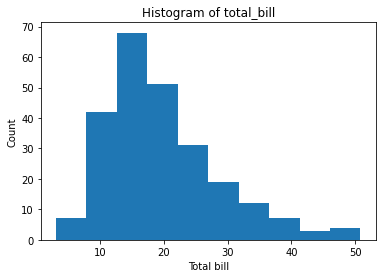

In [ ]:
# 1. figure 객체 생성.
fig = plt.figure()

# 2. figure 객체에 subplot(들)을 추가.
# figure.add_subplot(nrows, ncols, index) : subplot의 행 개수, 열 개수, 위치(인덱스)
# axis = fig.add_subplot(2, 1, 1)

# figure.add_subplot(pos) : '행/열/위치' 순서로 만들어진 3자리 정수
axis = fig.add_subplot(111) # = fig.add_subplot(1, 1, 1)

# 3. 각각의 subplot에 그래프를 그림.
axis.hist(x=tips['total_bill']) # 'total_bill' 컬럼의 히스토그램(histogram)

# 4. 그래프 옵션(들)을 설정.
axis.set_title('Histogram of total_bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

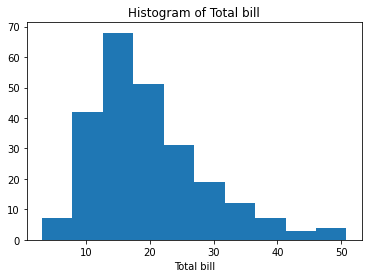

In [ ]:
# 1. figure 객체 생성 + subplot 추가
fig, ax = plt.subplots() # nrows=1, ncols=1 : default argument
# print(fig)
# print(ax)

# 2. subplot에 그래프를 그림
ax.hist(x = tips['total_bill'])

# 3. 옵션 설정
ax.set_title('Histogram of Total bill')
ax.set_xlabel('Total bill')

# 4. 그래프 보여주기.
plt.show()

1개의 figure에 1개의 subplot만 있는 경우에는 `pyplot` 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot, ...)를 직접 이용할 수도 있음.

top-level 함수를 사용하면 figure 생성과 1개의 subplot 추가를 별도의 코드로 작성할 필요가 없음.

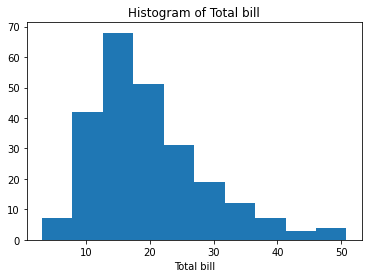

In [ ]:
# figure 생성 + subplot 추가 + 그래프 추가
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram of Total bill')
plt.xlabel('Total bill')

# 그래프 보여주기
plt.show()

* 1개의 figure에 2개의 subplot들을 위/아래로 배치.
* 위쪽 subplot에는 total_bill 히스토그램을 그림.
* 아래쪽 subplot에는 x축은 'total_bill', y축은 'tip'으로 하는 산점도 그래프.

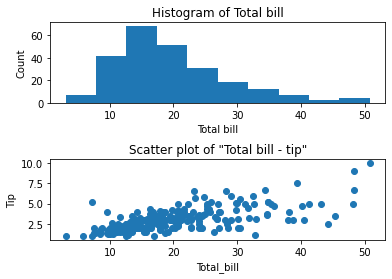

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.hist(x = tips['total_bill'])
ax2.scatter(tips['total_bill'], tips['tip'])

ax1.set_title('Histogram of Total bill')
ax1.set_xlabel('Total bill')
ax1.set_ylabel('Count')

ax2.set_title('Scatter plot of "Total bill - tip"')
ax2.set_xlabel('Total_bill')
ax2.set_ylabel('Tip')

plt.subplots_adjust(hspace=0.7) # subplot들 간의 horizontal space
plt.show()

* 1개의 figure에 2개의 subplot들을 좌우로 배치.
* 왼쪽 subplot에는 total_bill 히스토그램을 그림.
* 오른쪽 subplot에는 x축은 'total_bill', y축은 'tip'으로 하는 산점도 그래프.

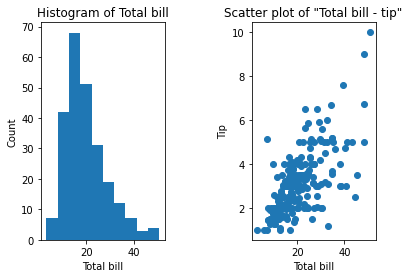

In [ ]:
fig, axes = plt.subplots(1, 2)
# fig : Figure 객체
# axes : Subplot 객체들의 배열(ndarray)

axes[0].hist(x = tips['total_bill'])
axes[1].scatter(tips['total_bill'], tips['tip'])

axes[0].set_title('Histogram of Total bill')
axes[0].set_xlabel('Total bill')
axes[0].set_ylabel('Count')

axes[1].set_title('Scatter plot of "Total bill - tip"')
axes[1].set_xlabel('Total bill')
axes[1].set_ylabel('Tip')

plt.subplots_adjust(wspace=0.7)
plt.show()

# Box Plot

숫자 타입 변수(컬럼)의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값) 시각화.

데이터들이 어느 정도 분산되어 있는지, 이상치(outlier)들이 있는지 등을 확인.

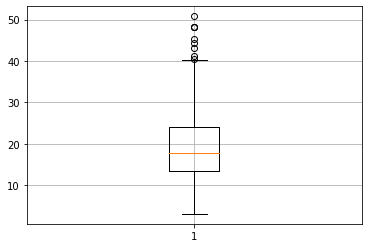

In [ ]:
plt.boxplot(x=tips.total_bill)
plt.grid()
plt.show()

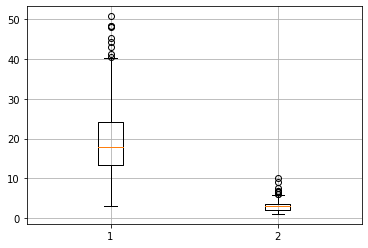

In [ ]:
# 1개의 figure와 subplot 안에 total_bill의 boxplot과 tip의 boxplot을 시각화
plt.boxplot(x=[tips.total_bill, tips.tip])
plt.grid()
plt.show()

* 성별별 tip의 box plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


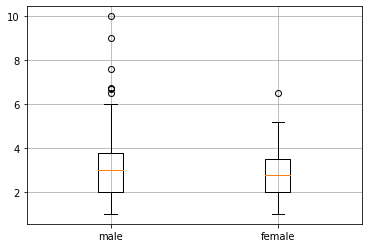

In [ ]:
male_tip = tips[tips['sex'] == 'Male']['tip']
female_tip = tips[tips['sex'] == 'Female']['tip']

plt.boxplot(x = [male_tip, female_tip])
plt.grid()
plt.xticks([1,2], ['male', 'female'])
plt.show()

* 시간별 tip의 box plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


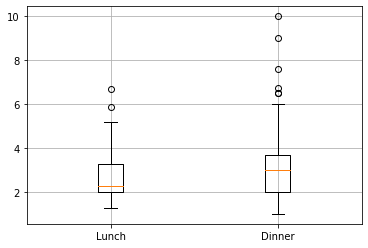

In [ ]:
lunch_tip = tips[tips['time'] == 'Lunch']['tip']
dinner_tip = tips[tips['time'] == 'Dinner']['tip']

plt.boxplot(x = [lunch_tip, dinner_tip])
plt.xticks([1,2], ['Lunch', 'Dinner'])
plt.grid()
plt.show()

* 요일별 tip의 box plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


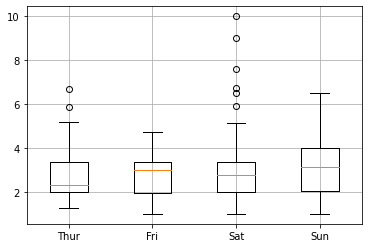

In [ ]:
Thur_tip = tips[tips['day'] == 'Thur']['tip']
Fri_tip = tips[tips['day'] == 'Fri']['tip']
Sat_tip = tips[tips['day'] == 'Sat']['tip']
Sun_tip = tips[tips['day'] == 'Sun']['tip']

plt.boxplot( x = [Thur_tip, Fri_tip, Sat_tip, Sun_tip], labels = ['Thur', 'Fri', 'Sat', 'Sun'] )
plt.grid()
plt.show()

In [ ]:
# 카테고리 타입 변수를 카테고리 순서로 출력 :
# data_frame.column.cat.categories
# data_frame['column'].cat.categories
# cat : 카테고리 접근자 (Category Accessor)
tips.day.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

# Histogram

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프.

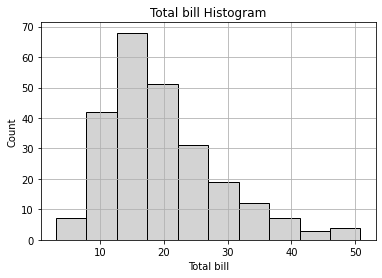

In [ ]:
plt.hist(x=tips.total_bill, # 히스토그램을 그리기 위한 연속형 자료
         bins=10,           # 막대의 개수 또는 나누는 구간. default : 10
         edgecolor='black', # 막대의 테두리 색
         color='lightgray', # 막대의 내부 색
         )

plt.grid() # 격자 보조선
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.title('Total bill Histogram')
plt.show()

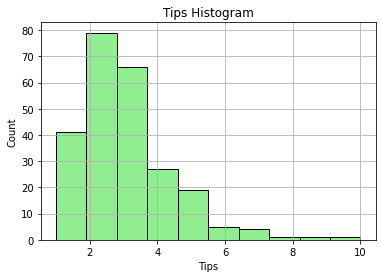

In [ ]:
# tip의 히스토그램
plt.hist(x=tips.tip,
         edgecolor='black',
         color='lightgreen')
plt.grid()
plt.xlabel('Tips')
plt.ylabel('Count')
plt.title('Tips Histogram')
plt.show()

# 막대 그래프

카테고리 타입 자료의 빈도 수를 막대로 표현한 그래프.

In [ ]:
# 성별 빈도수
gender_counts = tips.sex.value_counts()
gender_counts

Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
print(gender_counts.index)
print(gender_counts.values)

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')
[157  87]


## 세로 막대 그래프(Vertical Bar Plot)

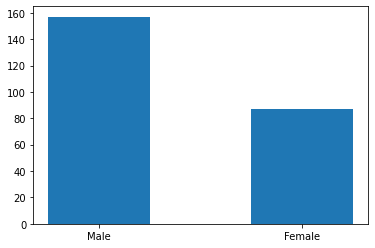

In [ ]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width = 0.5)
plt.show()

## 가로 막대 그래프(Horizontal Bar Plot)

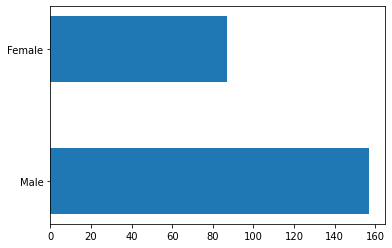

In [ ]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height = 0.5)
plt.show()

* size의 빈도수 세로/가로 막대 그래프

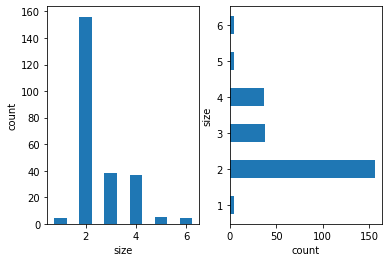

In [ ]:
t_size = tips['size'].value_counts()

fig, ax = plt.subplots(1, 2)

ax[0].bar(x = t_size.index, height = t_size.values, width = 0.5)
ax[1].barh(y = t_size.index, width = t_size.values, height = 0.5)

ax[0].set_xlabel('size')
ax[0].set_ylabel('count')
ax[1].set_xlabel('count')
ax[1].set_ylabel('size')

plt.show()

* 4개의 Subplot(row 2개, column 2개)를 Figure에 추가
* 각각의 Subplot에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 세로 막대 그래프를 시각화.

In [ ]:
tc = tips.columns.unique()
tc

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
gender_counts = tips.sex.value_counts()
smoke_counts = tips.smoker.value_counts()
day_counts = tips.day.value_counts()
time_counts = tips.time.value_counts()

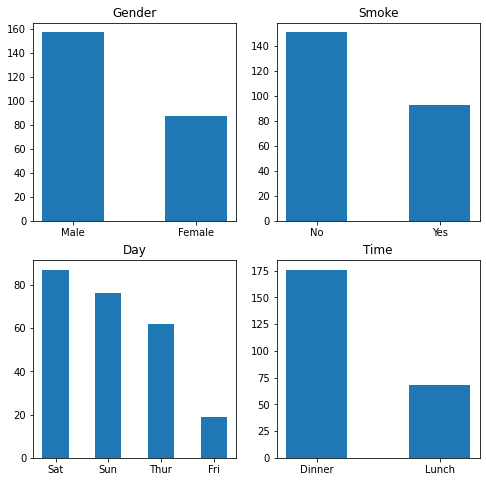

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (8, 8))
ax[0, 0].bar(x = gender_counts.index, height = gender_counts.values, width = 0.5)
ax[0, 1].bar(x = smoke_counts.index, height = smoke_counts.values, width = 0.5)
ax[1, 0].bar(x = day_counts.index, height = day_counts.values, width = 0.5)
ax[1, 1].bar(x = time_counts.index, height = time_counts.values, width = 0.5)

ax[0,0].set_title('Gender')
ax[0,1].set_title('Smoke')
ax[1,0].set_title('Day')
ax[1,1].set_title('Time')
plt.show()

# 산점도(Scatter Plot)

두 변수(컬럼)의 상관 관계를 파악할 때 사용.

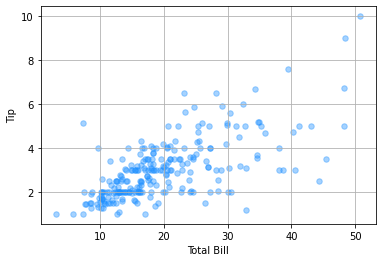

In [ ]:
plt.scatter(x=tips.total_bill, y=tips.tip,  # x축, y축에 사용할 자료
            alpha = 0.4,                    # 투명도 : 0 ~ 1까지 값을 사용. 0에 가까울수록 투명, 1에 가까울수록 불투명
            s = 30,                         # 마커(점)의 크기(size)
            c = 'dodgerblue',               # 마커의 색깔(color)
            marker = 'o')                   # 마커 모양(o, s, ^, v, , +, ...)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

* tip ~ total_bill의 산점도
* 남성인 경우에는 마커 색을 `blue`, 여성인 경우에는 마커 색을 `red`

In [ ]:
male_tip = tips[tips['sex'] == 'Male']
female_tip = tips[tips['sex'] == 'Female']

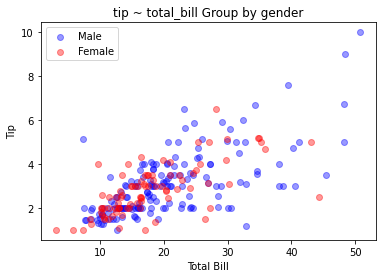

In [ ]:
plt.scatter(x = male_tip.total_bill, y = male_tip.tip,
            c = 'blue', alpha = 0.4)
plt.scatter(x = female_tip.total_bill, y = female_tip.tip,
            c = 'red', alpha = 0.4)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('tip ~ total_bill Group by gender')
plt.legend(("Male", "Female")) # 범례 : 각각의 scatter 함수의 label argument를 표시.
plt.show()

* tip ~ total의 산점도
* 성별에 따라 마커의 색깔을 다르게 표현.
* 흡연 여부에 따라 마커의 모양을 다르게 표현.

In [ ]:
male_smoke_y = male_tip[male_tip['smoker'] == 'Yes']
male_smoke_n = male_tip[male_tip['smoker'] == 'No']
female_smoke_y = female_tip[female_tip['smoker'] == 'Yes']
female_smoke_n = female_tip[female_tip['smoker'] == 'No']

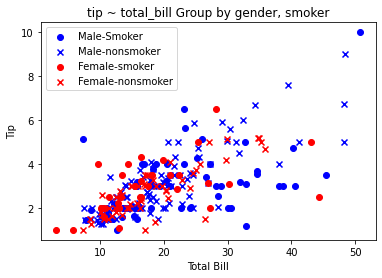

In [ ]:
plt.scatter(x = male_smoke_y.total_bill, y = male_smoke_y.tip,
            c = 'blue', marker = 'o')
plt.scatter(x = male_smoke_n.total_bill, y = male_smoke_n.tip,
            c = 'blue', marker = 'x')
plt.scatter(x = female_smoke_y.total_bill, y = female_smoke_y.tip,
            c = 'red', marker = 'o')
plt.scatter(x = female_smoke_n.total_bill, y = female_smoke_n.tip,
            c = 'red', marker = 'x')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('tip ~ total_bill Group by gender, smoker')
plt.legend(("Male-Smoker", "Male-nonsmoker","Female-smoker", "Female-nonsmoker"))
plt.show()

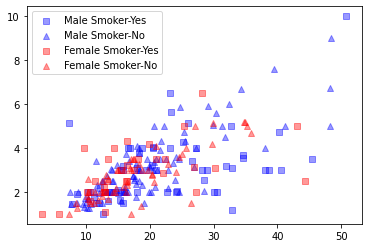

In [ ]:
gender = tips.sex.cat.categories
smoker = tips.smoker.cat.categories

colors = ['blue', 'red'] # 성별에 따른 마커 색 구분(남성-blue, 여성-red)
markers = ['s', '^']     # 흡연 여부에 따른 마커 모양 구분(Yes-s, No-^)

for g,c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        subset_df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x=subset_df.total_bill, y=subset_df.tip,
                    c=c, marker=m, alpha = 0.4, label = f'{g} Smoker-{s}')

plt.legend()
plt.show()

# 선 그래프(Line Plot)

시계열 그래프(주식 가격, 환율, 미세먼지 농도, 코로나 확진자 수, ...)를 표현

In [ ]:
# 선 그래프를 위한 가상의 데이터 프레임 작성.
np.random.seed(1) # 난수가 생성되는 순서를 유지시키기 위해서.
df = pd.DataFrame({'x1' : np.arange(10),
                   'x2' : np.random.rand(10)})
df

,x1,x2
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


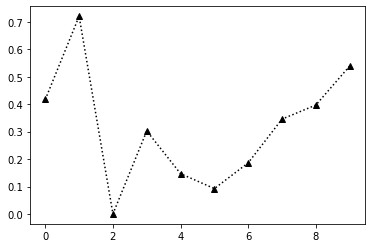

In [ ]:
plt.plot(df.x1, df.x2, 'k^:')
# plot 함수의 3번째 argument - format string : 'color-marker-line_style'
# color : b(lue), r(ed), g(reen), (blac)k, ...
# marker : o, s, ^, v, ...
# line style : - (solid line), -- (dashed line), : (dotted line)

plt.show()

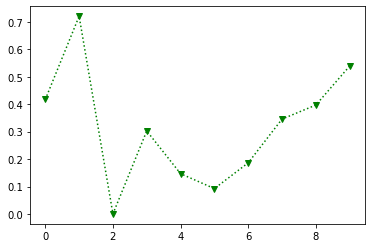

In [ ]:
plt.plot(df.x1, df.x2, c='green', marker='v', linestyle = ':')
plt.show()

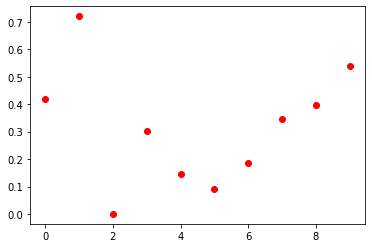

In [ ]:
# plot 함수에서 linestyle을 입력하지 않으면 산점도가 됨.
plt.plot(df.x1, df.x2, c='r', marker='o', linestyle='')
plt.show()

In [ ]:
np.random.seed(1)
df = pd.DataFrame({'y1' : np.random.rand(10),
                   'y2' : np.random.rand(10),
                   'y3' : np.random.rand(10)})
df

,y1,y2,y3
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


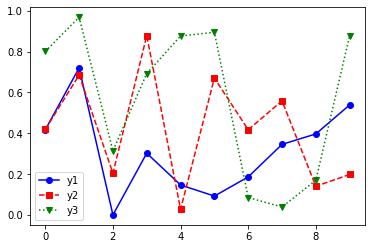

In [ ]:
plt.plot(df.y1, 'bo-', label='y1')
plt.plot(df.y2, 'rs--', label='y2')
plt.plot(df.y3, 'gv:', label='y3')
plt.legend()
plt.show()

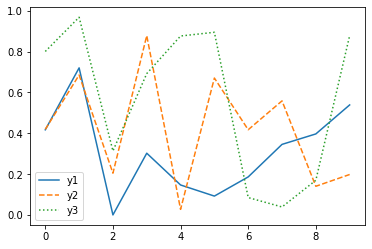

In [ ]:
linestyles = ['solid', 'dashed', 'dotted']

for y, ls in zip(df.columns, linestyles):
    plt.plot(df[y], label= y, linestyle=ls)

plt.legend()
plt.show()